# Project Suggestion 5:

## Plot geological data versus species richness.
download the dataset from this web page: https://www.research-collection.ethz.ch/handle/20.500.11850/411821
Integrate the data to see whether correlation between any of the geological data points correlate with species richness of tetrapods, amphibians and/or mammals. To do so, create a python script that extracts the data from the desired columns and plot the data in scatterplots with pandas. You can choose yourself which data columns from the dataset you would like to use.


# Reading Data as Dataframe
I made a subset of the downloaded data (global_data_50m.txt) using the copy_head.py to work with more easily. The code should work with the whole dataset, but it was only tested on 5000 rows of the dataset.

In [1]:
import pandas as pd

df = pd.read_csv("data/global_data_5k.txt") # subset done with copy_head.py; here read as Dataframe

# naming colomns, names taken from R code the dataset came with
fixed_column_names = ["Elev","Locrel","slope","P",'T','NDVIavg','NDVImax','y','x','ksn','tetrapods','Amphibians','Mammals','KG','Geo','LC','SR'] 
df.columns = fixed_column_names

df = df.replace(-9999,0) # replaces -9999 with 0; seemed to be a NAN error or something similar, the fix is also taken from the R code

print(df) 

      Elev  Locrel  slope    P    T  NDVIavg  NDVImax     y      x  ksn  \
0       94     195     80  690  234        3       29  2030 -12125  102   
1      179     221     65  665  236       88      209  2078 -11705  187   
2      159     240     11  731  236       95      220  2079 -11704  114   
3      238     290     63  692  232       95      218  2078 -11704  175   
4      202     322     52  645  234       93      216  2077 -11704  255   
...    ...     ...    ...  ...  ...      ...      ...   ...    ...  ...   
4994   424     152     41  402  219      123      199  2564 -11267   85   
4995   427     171     29  407  217      127      203  2563 -11267   96   
4996   503     230     52  414  213      132      210  2562 -11267   70   
4997   580     186     57  407  210      133      215  2561 -11267   77   
4998   513     256     63  372  212      127      209  2560 -11267  114   

      tetrapods  Amphibians  Mammals  KG  Geo  LC  SR  
0            22           0        0   0   

# Searching for some correlations

In [4]:
from scipy.stats import pearsonr # perarsonr calculates Pearson correlation coefficent a measure of linear correlation

# categorizing the data in geological data and species
geo_factors = ["Elev","Locrel","slope","P",'T','NDVIavg','NDVImax','y','x','ksn','KG','Geo','LC','SR']
species_richness = ['tetrapods','Amphibians','Mammals']

relevant_PCC = [] # Pearson Correlation Coefficient
PCC_tupel=()

for species in species_richness:
    for factor in geo_factors:
        corr, p_value = pearsonr(df[factor], df[species])
        
        
        if corr >= 0.5 or corr <= -0.5: # looking for interessting possible correlations that have a coefficent 
            PCC_tupel = (factor, species, corr) # saving them as tuple, because they are ordered and not changeble
            relevant_PCC.append(PCC_tupel) 
        
        #print(f'Pearson correlation between {factor} and {species}: {corr:.2f}') #used for testing

print("Pearson correlation between: \n")
for i in relevant_PCC:
    to_float = float(i[2])
    print (f'{i[0]} and {i[1]}: {to_float:.2f}')

Pearson correlation between: 

Locrel and tetrapods: -0.55
P and Amphibians: 0.52
T and Amphibians: 0.62
NDVIavg and Amphibians: 0.72
NDVImax and Amphibians: 0.65
y and Amphibians: -0.66
Locrel and Mammals: -0.62
slope and Mammals: -0.53
x and Mammals: 0.54


# Plotting the Data
Choosing interesting columns and showing them in a graph. 

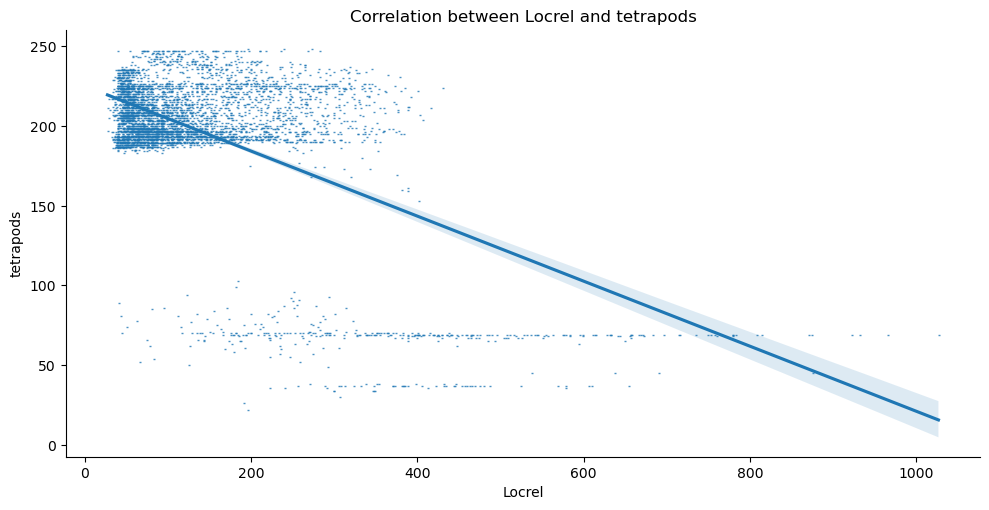

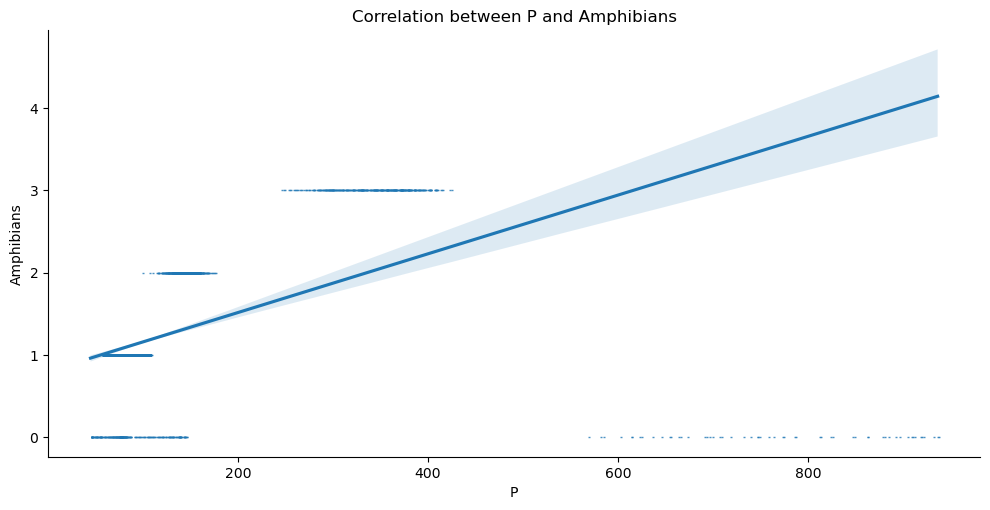

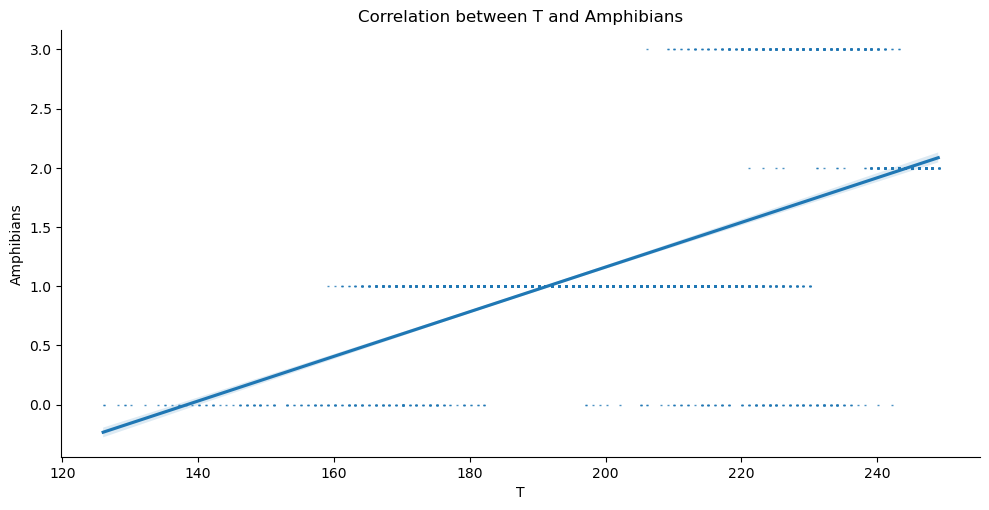

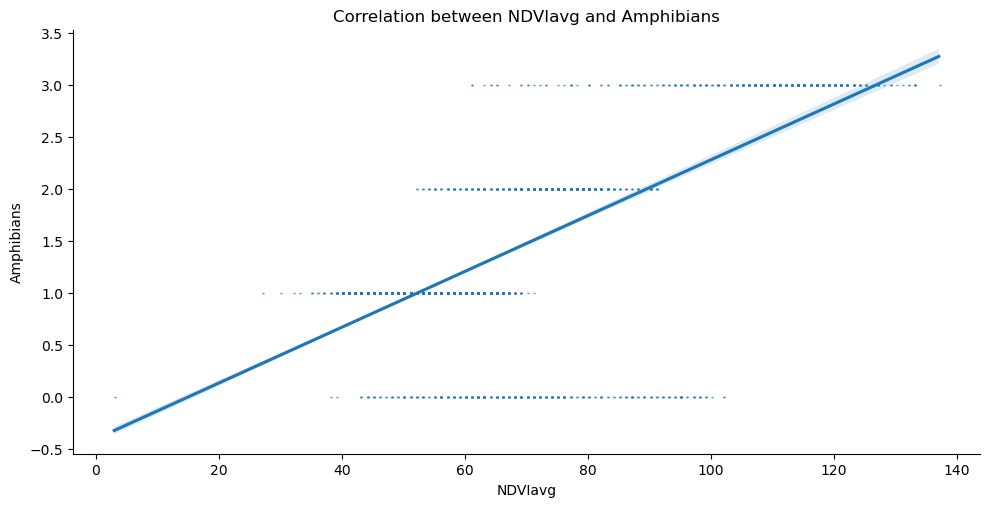

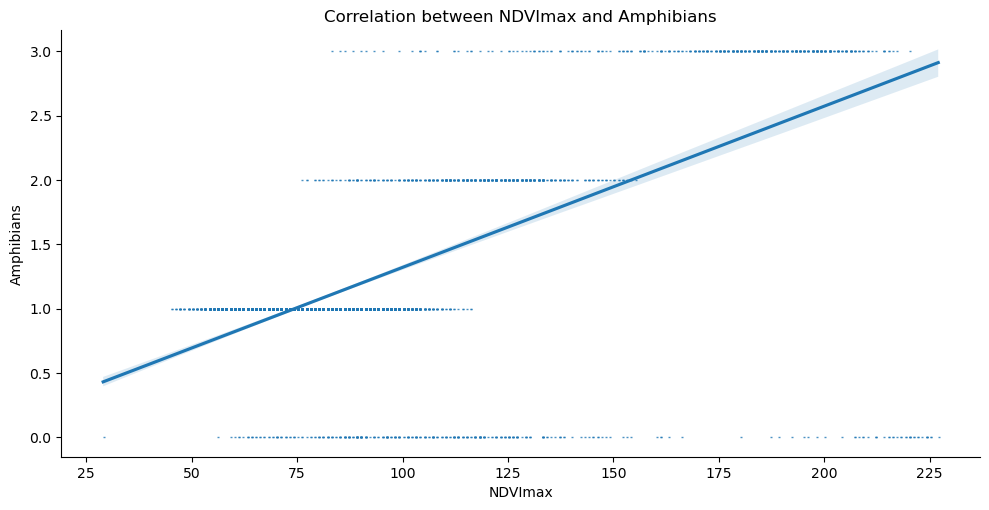

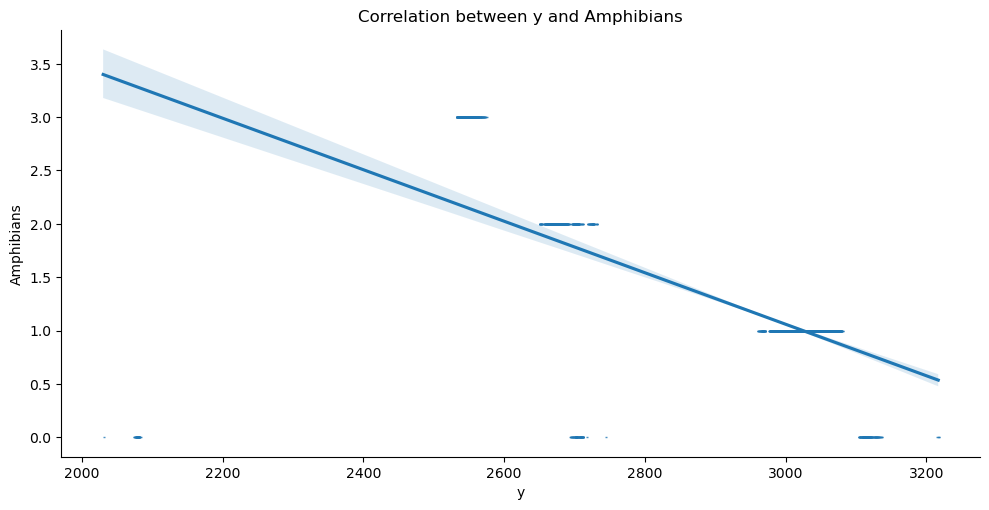

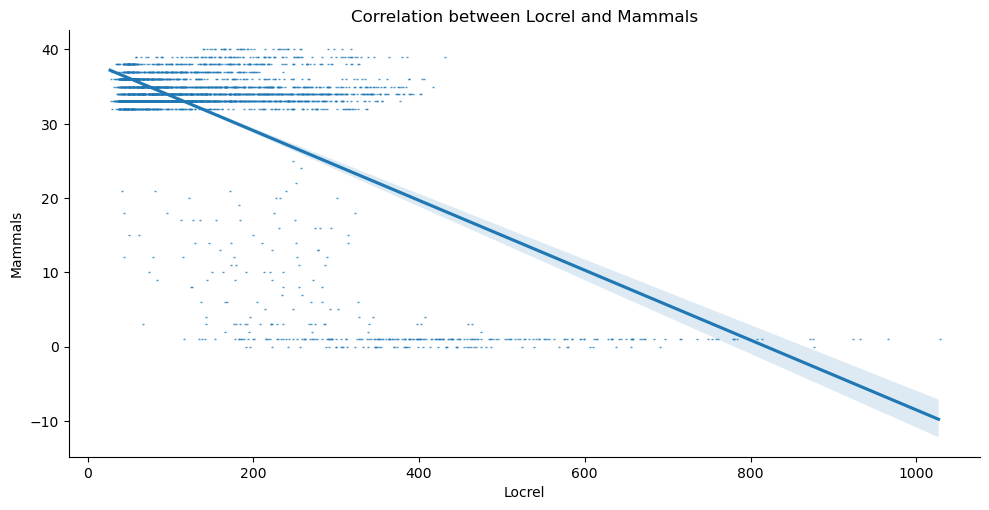

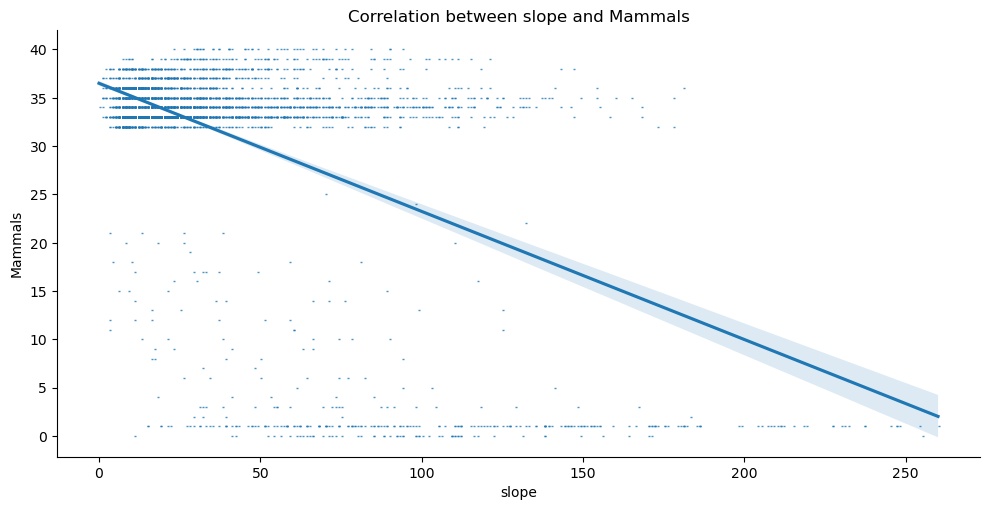

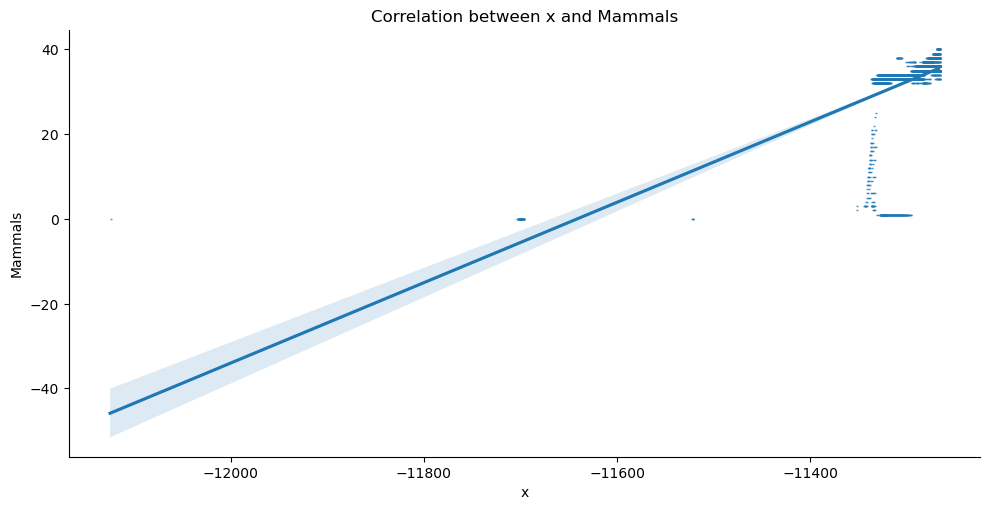

In [8]:
import seaborn as sns # seaborn uses plt, but has a few more functions and looks nicer
import matplotlib.pyplot as plt

# making plots for every interessting PCC found before
for i in relevant_PCC:
    x_column = i[0]
    y_column = i[1]
    
    plot_df = df[[x_column, y_column]] # dataframe with chosen columns
    ax = sns.lmplot(x=x_column, y=y_column, data=plot_df, scatter_kws={'s': 3}, markers = 1, aspect = 2, palette = 'colorblind') 
    # lmplot is additonally trying to show a visual linear correlation; aspect for better visualization; sns.scatterplot would work as well, but does not look as nice
    plt.title(f'Correlation between {x_column} and {y_column}')

plt.show()